# Comparing versions of activation spreads

In [1]:
import sys
sys.path.insert(1, '../')
from graphsemnet.gsn import compute_nmph, spread_activation, rect, compute_adjacency
from scipy.special import expit
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_context('notebook')

In [3]:
from graphsemnet.gsn_api import GraphOperator, operate_breadth, operate_depth
from graphsemnet.semantics import SemanticGraph
import graphsemnet.xcal as gx

In [4]:
import graphsemnet.gsn_api as ga
import graphsemnet.semantics as gs
import graphsemnet.xcal as gx

In [5]:
import json

In [41]:
import copy

We are going to compare versions of the spread of activation. In particular, we are going to change two key variables:

1. The type of spread of activation
    1. Depth first (recursive)
    2. Breadth first (iterative)
2. The effect of the shape of the NMPH
    1. No initial change
    2. Depotentiation at the beginning

In [6]:
# Load some data
with open('../data/test_adjacency.json') as f:
    adj = json.load(f)
with open('../data/test_adjacency_labels.json') as f:
    labels = json.load(f)

In [7]:
adj = 1. - np.array(adj)
np.fill_diagonal(adj, 0)

In [8]:
graph = SemanticGraph(adj=adj, labels=labels)

In [9]:
def plot_graph(graph):
    with sns.plotting_context('notebook'):
        sns.heatmap(graph.adj, xticklabels=graph.labels, yticklabels=graph.labels, square=True)

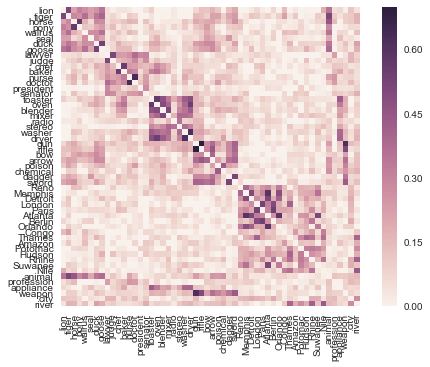

In [10]:
plot_graph(graph)

In [11]:
xcal = gx.get_xcal(
    dip_center=.3,
    dip_width=.3,
    y_min=-.05,
    y_max=.05
)

In [12]:
from scipy.spatial.distance import squareform

In [13]:
np.median(squareform(graph.adj, checks=False))

0.067298763453789268

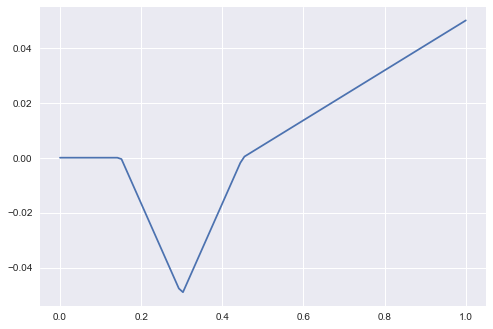

In [14]:
x = np.linspace(0, 1, 100)
plt.plot(x, xcal(x))

In [90]:
nwords = len(labels)
activation = np.zeros(nwords)
activation[0] = 1.

decay = 0.5

In [36]:
op_d = GraphOperator(graph, operate_depth, xcal, decay)
op_b = GraphOperator(graph, operate_breadth, xcal, decay)

In [82]:
new_graph_d, act_d = op_d.activate(activation)
new_graph_b, act_b = op_b.activate(activation, alpha=1, d=3, lambda_=0.5)

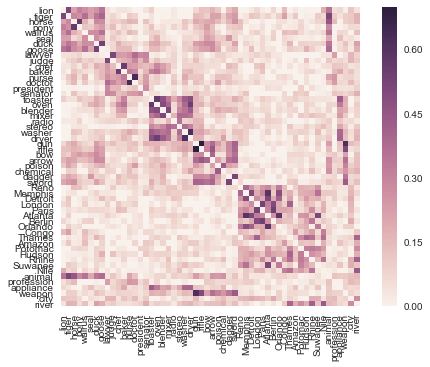

In [94]:
plot_graph(graph)

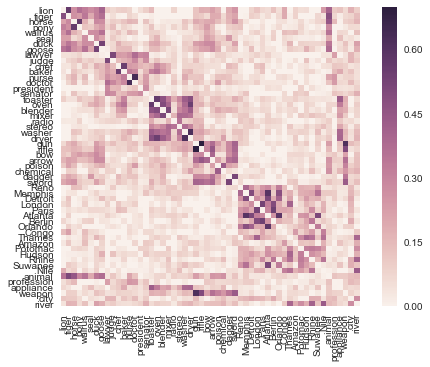

In [95]:
plot_graph(new_graph_b)

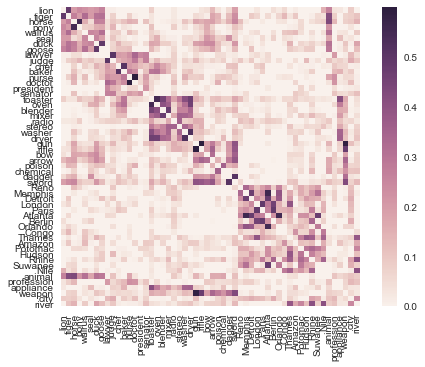

In [96]:
plot_graph(new_graph_d)

In [97]:
def diff_graph(graph1, graph2):
    dg = copy.deepcopy(graph1)
    dg.adj -= graph2.adj
    return dg

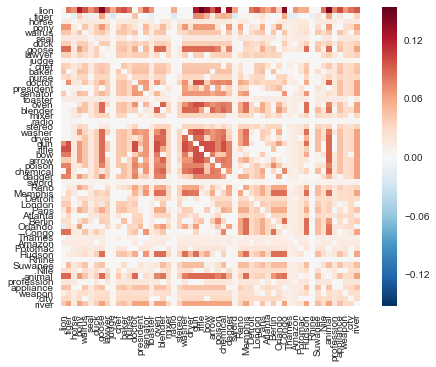

In [98]:
plot_graph(diff_graph(new_graph_b, new_graph_d))

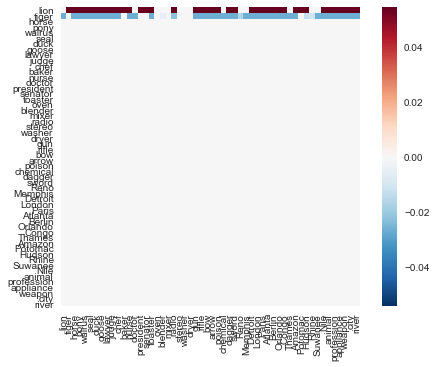

In [99]:
plot_graph(diff_graph(new_graph_b, graph))

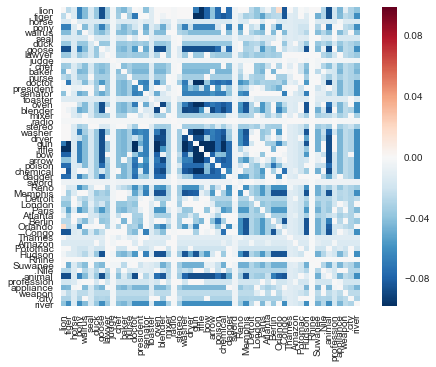

In [100]:
plot_graph(diff_graph(new_graph_d, graph))

Differences

1. Depth-first generates always a symmetric weight matrix, while breadth-first doesn't

# Comparing methods with Goodmon & Anderson paradigm

In [113]:
with open('../data/goodmon_words_reduced.json') as f:
    goodmon = json.load(f)

In [115]:
goodmon.keys()

dict_keys(['lion', 'tiger', 'horse', 'pony', 'walrus', 'seal', 'duck', 'goose', 'lawyer', 'judge', 'chef', 'baker', 'nurse', 'doctor', 'president', 'senator', 'animal', 'profession'])